<a href="https://colab.research.google.com/github/ArchieFauzan/TUgas-P10/blob/main/TugasPertemuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/TugasP10

/content/drive/MyDrive/TugasP10


In [6]:
ls

3scene@  contoh_coast.jpg  modelscene/


In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [10]:
print("Please Wait....")
imagePaths = paths.list_images("3scene")
data = []
labels = []

Please Wait....


In [11]:
for gambar in imagePaths:
  image = Image.open(gambar)
  image = np.array(image.resize((64, 64))) /255.0
  data.append(image)

  label = gambar.split(os.path.sep)[-2]
  labels.append(label)

In [12]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [13]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [14]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [15]:
(traina, testa, trainb, testb) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(traina.shape)
print(testa.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [134]:
  from keras.models import Sequential
  from keras.layers.core import Flatten
  from keras.layers.core import Dense

  model = Sequential (
      [
      Flatten(input_shape=(64*64*3,)),
      Dense(144, activation="relu", name="1st"),
      Dense(24, activation="relu", name="2nd"),
      Dense(24, activation="relu", name="3rd"),
      Dense(24, activation="relu", name="4th"),
      Dense(3, activation = "softmax", name="5th"),
      ]
  )

In [135]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 12288)             0         
_________________________________________________________________
1st (Dense)                  (None, 144)               1769616   
_________________________________________________________________
2nd (Dense)                  (None, 24)                3480      
_________________________________________________________________
3rd (Dense)                  (None, 24)                600       
_________________________________________________________________
4th (Dense)                  (None, 24)                600       
_________________________________________________________________
5th (Dense)                  (None, 3)                 75        
Total params: 1,774,371
Trainable params: 1,774,371
Non-trainable params: 0
____________________________________________

In [145]:
print("Training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model.fit(traina, trainb, validation_data=(testa, testb), epochs=70, batch_size=32)

Training network...
Epoch 1/70
23/23 [==============================] - 0s 18ms/step - loss: 0.8188 - accuracy: 0.8354 - val_loss: 1.0529 - val_accuracy: 0.7806
Epoch 2/70
23/23 [==============================] - 0s 13ms/step - loss: 0.0733 - accuracy: 0.9859 - val_loss: 0.9860 - val_accuracy: 0.8228
Epoch 3/70
23/23 [==============================] - 0s 13ms/step - loss: 0.0480 - accuracy: 0.9902 - val_loss: 1.0356 - val_accuracy: 0.8143
Epoch 4/70
23/23 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.9958 - val_loss: 1.0982 - val_accuracy: 0.8059
Epoch 5/70
23/23 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.9944 - val_loss: 1.3475 - val_accuracy: 0.7384
Epoch 6/70
23/23 [==============================] - 0s 13ms/step - loss: 0.0583 - accuracy: 0.9775 - val_loss: 1.1372 - val_accuracy: 0.8143
Epoch 7/70
23/23 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.9930 - val_loss: 1.1868 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


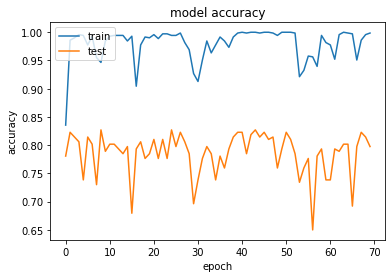

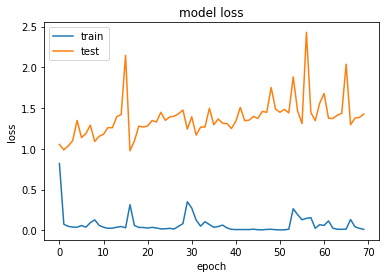

In [146]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
print("Evaluating network...")
predictions = model.predict(testa, batch_size=32)
print(classification_report(testb.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))

Evaluating network...
              precision    recall  f1-score   support

       coast       0.74      0.80      0.77        86
      forest       0.90      0.77      0.83        82
     highway       0.77      0.83      0.80        69

    accuracy                           0.80       237
   macro avg       0.80      0.80      0.80       237
weighted avg       0.80      0.80      0.80       237



In [148]:
model.save('modelscene')

INFO:tensorflow:Assets written to: modelscene/assets


In [188]:
import cv2
import matplotlib.pyplot as plt
image1='highway_test.jpg'

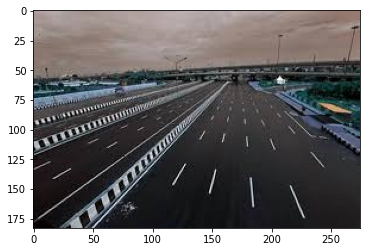

In [189]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()


In [190]:
image_testing = Image.open('highway_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [191]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [192]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.00398833 0.00140065 0.994611  ]]
['highway']
